In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#the table is in the file housing.csv
airbnb = pd.read_csv("AB_NYC_2019.csv")
#use head function to show the first five rows
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
airbnb.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [4]:
airbnb.shape

(48895, 16)

In [5]:
len(airbnb)

48895

In [6]:
airbnb.isna().sum().sum()

20141

In [7]:
data_missing=(airbnb.isnull().sum(axis=0)/airbnb.shape[0]) * 100
data_missing

id                                 0.000000
name                               0.032723
host_id                            0.000000
host_name                          0.042949
neighbourhood_group                0.000000
neighbourhood                      0.000000
latitude                           0.000000
longitude                          0.000000
room_type                          0.000000
price                              0.000000
minimum_nights                     0.000000
number_of_reviews                  0.000000
last_review                       20.558339
reviews_per_month                 20.558339
calculated_host_listings_count     0.000000
availability_365                   0.000000
dtype: float64

In [8]:
# Clean columns (With no missing values)
data_missing[data_missing==0].index

Index(['id', 'host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [9]:
bad_columns= data_missing[data_missing >0].index
bad_columns

Index(['name', 'host_name', 'last_review', 'reviews_per_month'], dtype='object')

In [10]:
bad_rows = airbnb[airbnb[bad_columns].isnull().any(axis=1)]

# Remove the bad rows
airbnb_new = airbnb.dropna(subset=bad_columns)

In [11]:
airbnb_new.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [12]:
airbnb_new.isnull().sum()

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [13]:
# purely categorical columns
categorical_features=airbnb_new.select_dtypes(include=['object']).columns.values
categorical_features

array(['name', 'host_name', 'neighbourhood_group', 'neighbourhood',
       'room_type', 'last_review'], dtype=object)

In [14]:
airbnb_new1 = airbnb_new.drop(airbnb_new.columns[[1,3,12]], axis=1)
airbnb_new1.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,5099,7322,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129


In [15]:
airbnb_new1= airbnb_new1.drop(airbnb_new1.columns[[0,1]], axis=1)

In [16]:
airbnb_new1.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129


In [18]:
#Save Content
airbnb_new1.to_csv("airbnb.csv", index=False)

In [23]:
airbnb_new2 = airbnb_new1.drop(airbnb_new1.columns[[0,1]], axis=1)
airbnb_new2.head()

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
3,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0
5,40.74767,-73.97500,Entire home/apt,200,3,74,0.59,1,129


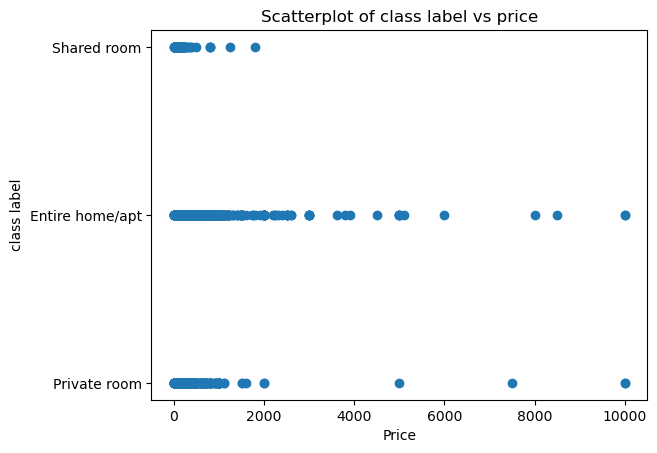

In [29]:
plt.scatter(airbnb_new2['price'],airbnb_new2['room_type'])

# Add labels and title to the scatterplot
plt.xlabel('Price')
plt.ylabel('class label')
plt.title('Scatterplot of class label vs price')

# Show the scatterplot
plt.show()

In [30]:
mapping = {'Shared room': 0, 'Entire home/apt': 1, 'Private room': 2}

# Use the map method to replace the original class labels with the desired labels
airbnb_new2['room_type']=airbnb_new2['room_type'].map(mapping)

In [31]:
print('room_type:', np.unique(airbnb_new2['room_type']))

room_type: [0 1 2]


In [32]:
airbnb_new2.head()

,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,2,149,1,9,0.21,6,365
1,40.75362,-73.98377,1,225,1,45,0.38,2,355
3,40.68514,-73.95976,1,89,1,270,4.64,1,194
4,40.79851,-73.94399,1,80,10,9,0.10,1,0
5,40.74767,-73.97500,1,200,3,74,0.59,1,129


In [33]:
#Save Content
airbnb_new2.to_csv("Airbnb_data_cleaned_room_type.csv", index=False)

In [39]:
airbnb_new3 = airbnb_new1.drop(airbnb_new1.columns[[1,4]], axis=1)
airbnb_new3.head()

,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,40.64749,-73.97237,149,1,9,0.21,6,365
1,Manhattan,40.75362,-73.98377,225,1,45,0.38,2,355
3,Brooklyn,40.68514,-73.95976,89,1,270,4.64,1,194
4,Manhattan,40.79851,-73.94399,80,10,9,0.10,1,0
5,Manhattan,40.74767,-73.97500,200,3,74,0.59,1,129


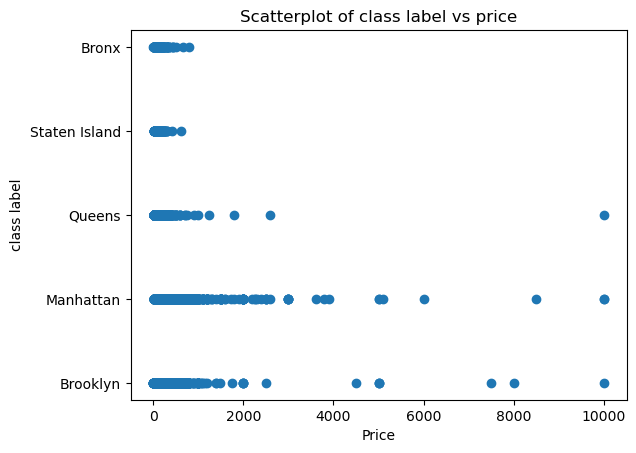

In [40]:
plt.scatter(airbnb_new3['price'],airbnb_new3['neighbourhood_group'])

# Add labels and title to the scatterplot
plt.xlabel('Price')
plt.ylabel('class label')
plt.title('Scatterplot of class label vs price')

# Show the scatterplot
plt.show()

In [41]:
mapping = {'Bronx': 0, 'Staten Island': 1, 'Queens': 2, 'Manhattan': 3, 'Brooklyn': 4}

# Use the map method to replace the original class labels with the desired labels
airbnb_new3['neighbourhood_group']=airbnb_new3['neighbourhood_group'].map(mapping)

In [42]:
print('neighbourhood_group:', np.unique(airbnb_new3['neighbourhood_group']))

neighbourhood_group: [0 1 2 3 4]


In [26]:
#Save Content
airbnb_new3.to_csv("Airbnb_data_cleaned_neighbouhood_group.csv", index=False)

In [ ]:
#Save Content
airbnb_new1.to_csv("Airbnb_data_cleaned2.csv", index=False)

In [15]:
airbnb_final=pd.get_dummies(airbnb_new1)
airbnb_final.head()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,...,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,2539,2787,40.64749,-73.97237,149,1,9,0.21,6,365,...,0,0,0,0,0,0,0,0,1,0
1,2595,2845,40.75362,-73.98377,225,1,45,0.38,2,355,...,0,0,0,0,0,0,0,1,0,0
3,3831,4869,40.68514,-73.95976,89,1,270,4.64,1,194,...,0,0,0,0,0,0,0,1,0,0
4,5022,7192,40.79851,-73.94399,80,10,9,0.10,1,0,...,0,0,0,0,0,0,0,1,0,0
5,5099,7322,40.74767,-73.97500,200,3,74,0.59,1,129,...,0,0,0,0,0,0,0,1,0,0


In [16]:
airbnb_final.isna().sum().sum()

0

In [17]:
airbnb_data = airbnb_final.drop(airbnb_final.columns[[0,1]], axis=1)

In [18]:
airbnb_data.head()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,...,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodside,room_type_Entire home/apt,room_type_Private room,room_type_Shared room
0,40.64749,-73.97237,149,1,9,0.21,6,365,0,1,...,0,0,0,0,0,0,0,0,1,0
1,40.75362,-73.98377,225,1,45,0.38,2,355,0,0,...,0,0,0,0,0,0,0,1,0,0
3,40.68514,-73.95976,89,1,270,4.64,1,194,0,1,...,0,0,0,0,0,0,0,1,0,0
4,40.79851,-73.94399,80,10,9,0.10,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,40.74767,-73.97500,200,3,74,0.59,1,129,0,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
#Save Content
airbnb_data.to_csv("Airbnb_data_cleaned1.csv", index=False)

In [33]:
#Save Content
airbnb_final.to_csv("Airbnb_data_cleaned.csv", index=False)